In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('movie_metadata.csv')

In [3]:
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [4]:
data.shape

(5043, 28)

In [5]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [7]:
data = data.drop(['color', 'director_facebook_likes', 'actor_3_facebook_likes','actor_1_facebook_likes','cast_total_facebook_likes',
                 'facenumber_in_poster','content_rating','actor_2_facebook_likes','country','movie_imdb_link','aspect_ratio',
                 'plot_keywords'], axis = 1)

In [8]:
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [9]:
data.isnull().sum()

director_name             104
num_critic_for_reviews     50
duration                   15
actor_2_name               13
gross                     884
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
actor_3_name               23
num_user_for_reviews       21
language                   12
budget                    492
title_year                108
imdb_score                  0
movie_facebook_likes        0
dtype: int64

In [10]:
data['gross']

0       760505847.0
1       309404152.0
2       200074175.0
3       448130642.0
4               NaN
           ...     
5038            NaN
5039            NaN
5040            NaN
5041        10443.0
5042        85222.0
Name: gross, Length: 5043, dtype: float64

In [12]:
data = data[~np.isnan(data['gross'])]
data = data[~np.isnan(data['budget'])]

In [13]:
data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [15]:
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(), inplace = True )
data['duration'].fillna(data['duration'].mean(), inplace = True )

data['language'].fillna(data['language'].mode()[0], inplace = True)

data['actor_2_name'].fillna("Unknown Actor", inplace = True)
data['actor_3_name'].fillna("Unknown Actor", inplace = True)

In [16]:
data.isnull().sum()

director_name             0
num_critic_for_reviews    0
duration                  0
actor_2_name              0
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              0
num_user_for_reviews      0
language                  0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [17]:
data.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,2701.0,English,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,132.0,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,738.0,English,263700000.0,2012.0,6.6,24000


## Profit

In [27]:
data['profit'] =  data['gross'] - data['budget']

data['profit'] =  data['profit']/1000000

In [28]:
data.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,3054.0,English,237000000.0,2009.0,7.9,33000,523.505847
1,Gore Verbinski,302.0,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,1238.0,English,300000000.0,2007.0,7.1,0,9.404152
2,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,994.0,English,245000000.0,2015.0,6.8,85000,-44.925825
3,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,2701.0,English,250000000.0,2012.0,8.5,164000,198.130642
5,Andrew Stanton,462.0,132.0,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,738.0,English,263700000.0,2012.0,6.6,24000,-190.641321


In [30]:
data.sort_values('profit', ascending = False).head(10)

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,3054.0,English,237000000.0,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,124.0,Judy Greer,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,Omar Sy,1290.0,English,150000000.0,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,194.0,Kate Winslet,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,Gloria Stuart,2528.0,English,200000000.0,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,125.0,Peter Cushing,460935665.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,Kenny Baker,1470.0,English,11000000.0,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,120.0,Dee Wallace,434949459.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,Peter Coyote,515.0,English,10500000.0,1982.0,7.9,34000,424.449459
794,Joss Whedon,703.0,173.0,Robert Downey Jr.,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,Scarlett Johansson,1722.0,English,220000000.0,2012.0,8.1,123000,403.279547
17,Joss Whedon,703.0,173.0,Robert Downey Jr.,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,Scarlett Johansson,1722.0,English,220000000.0,2012.0,8.1,123000,403.279547
509,Roger Allers,186.0,73.0,Nathan Lane,422783777.0,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,Niketa Calame,656.0,English,45000000.0,1994.0,8.5,17000,377.783777
240,George Lucas,320.0,136.0,Liam Neeson,474544677.0,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,Ian McDiarmid,3597.0,English,115000000.0,1999.0,6.5,13000,359.544677
66,Christopher Nolan,645.0,152.0,Heath Ledger,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,Morgan Freeman,4667.0,English,185000000.0,2008.0,9.0,37000,348.316061


In [32]:
data[['movie_title', 'profit']].sort_values('profit', ascending = False).head(10)

,movie_title,profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
794,The Avengers,403.279547
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061


In [33]:
data.drop_duplicates(subset = None, keep='first', inplace = True)

data.shape

(3853, 17)

In [34]:
data[['movie_title', 'profit']].sort_values('profit', ascending = False).head(10)

,movie_title,profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061
439,The Hunger Games,329.999255


In [35]:
data['language'].value_counts()

English       3673
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Korean           5
Portuguese       5
Norwegian        4
Persian          3
Thai             3
Hebrew           3
Dutch            3
Danish           3
Indonesian       2
Aboriginal       2
Dari             2
None             1
Bosnian          1
Swedish          1
Arabic           1
Kazakh           1
Filipino         1
Telugu           1
Maya             1
Russian          1
Czech            1
Dzongkha         1
Aramaic          1
Mongolian        1
Vietnamese       1
Romanian         1
Icelandic        1
Zulu             1
Hungarian        1
Name: language, dtype: int64

In [36]:
def language(x):
    if x == 'English':
        return 'English'
    else:
        return 'Foreign'
    
data['language'] = data['language'].apply(language)

data['language'].value_counts()

English    3673
Foreign     180
Name: language, dtype: int64

In [37]:
data['duration'].value_counts()

101.0    113
100.0    109
98.0     105
95.0      97
90.0      97
        ... 
197.0      1
63.0       1
293.0      1
200.0      1
330.0      1
Name: duration, Length: 157, dtype: int64

In [38]:
def duration(x):
    if x <= 120:
        return 'Short'
    else:
        return 'Long'
    
data['duration'] = data['duration'].apply(duration)

data['duration'].value_counts()

Short    2936
Long      917
Name: duration, dtype: int64

In [41]:
data['genres'].value_counts()

Drama                                        153
Comedy|Drama|Romance                         151
Comedy|Drama                                 147
Comedy                                       145
Comedy|Romance                               135
                                            ... 
Adventure|Animation|Comedy|Crime|Family        1
Comedy|Drama|Mystery|Romance|Thriller|War      1
Drama|Fantasy|Sci-Fi                           1
Adventure|Biography|Drama|Horror|Thriller      1
Adventure|Animation|Drama|Family|Fantasy       1
Name: genres, Length: 762, dtype: int64

In [42]:
data['genres'].str.split('|')[0]

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [43]:
data['MovieGenre'] = data['genres'].str.split('|')
data['Genre1'] = data['MovieGenre'].apply(lambda x: x[0])

data['Genre2'] = data['MovieGenre'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['Genre3'] = data['MovieGenre'].apply(lambda x: x[2] if len(x) > 2 else x[0])
data['Genre4'] = data['MovieGenre'].apply(lambda x: x[3] if len(x) > 3 else x[0])

In [44]:
data[['genres','Genre1','Genre2','Genre3','Genre4']].head(10)

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action
6,Action|Adventure|Romance,Action,Adventure,Romance,Action
7,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Adventure,Animation,Comedy,Family
8,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action
9,Adventure|Family|Fantasy|Mystery,Adventure,Family,Fantasy,Mystery
10,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


## Popular movies on social media

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,...,budget,title_year,imdb_score,movie_facebook_likes,profit,MovieGenre,Genre1,Genre2,Genre3,Genre4
0,James Cameron,723.0,Long,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,...,237000000.0,2009.0,7.9,33000,523.505847,"[Action, Adventure, Fantasy, Sci-Fi]",Action,Adventure,Fantasy,Sci-Fi
1,Gore Verbinski,302.0,Long,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,...,300000000.0,2007.0,7.1,0,9.404152,"[Action, Adventure, Fantasy]",Action,Adventure,Fantasy,Action
2,Sam Mendes,602.0,Long,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,...,245000000.0,2015.0,6.8,85000,-44.925825,"[Action, Adventure, Thriller]",Action,Adventure,Thriller,Action
3,Christopher Nolan,813.0,Long,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,...,250000000.0,2012.0,8.5,164000,198.130642,"[Action, Thriller]",Action,Thriller,Action,Action
5,Andrew Stanton,462.0,Long,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,...,263700000.0,2012.0,6.6,24000,-190.641321,"[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,Short,David Sullivan,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,Casey Gooden,...,7000.0,2004.0,7.0,19000,0.417760,"[Drama, Sci-Fi, Thriller]",Drama,Sci-Fi,Thriller,Drama
5034,Neill Dela Llana,35.0,Short,Edgar Tancangco,70071.0,Thriller,Ian Gamazon,Cavite,589,Quynn Ton,...,7000.0,2005.0,6.3,74,0.063071,[Thriller],Thriller,Thriller,Thriller,Thriller
5035,Robert Rodriguez,56.0,Short,Peter Marquardt,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,Consuelo Gómez,...,7000.0,1992.0,6.9,0,2.033920,"[Action, Crime, Drama, Romance, Thriller]",Action,Crime,Drama,Romance
5037,Edward Burns,14.0,Short,Caitlin FitzGerald,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,Daniella Pineda,...,9000.0,2011.0,6.4,413,-0.004416,"[Comedy, Drama]",Comedy,Drama,Comedy,Comedy


In [50]:
data['Social Media Popularity'] = ((data['num_user_for_reviews']/data['num_voted_users'])*(data['movie_facebook_likes']))

data[['movie_title','Social Media Popularity']].sort_values('Social Media Popularity', ascending = False).head(10)

,movie_title,Social Media Popularity
10,Batman v Superman: Dawn of Justice,1599.794424
150,Ghostbusters,1076.336425
1582,Ghostbusters,1075.827482
96,Interstellar,1024.560802
3015,10 Days in a Madhouse,828.025478
945,Into the Woods,692.937200
73,Suicide Squad,652.816996
1190,Fifty Shades of Grey,624.306881
108,Warcraft,622.790277
92,Independence Day: Resurgence,599.274128


In [51]:
data['title_year'] = data['title_year'].astype('int')

In [57]:
data[['language','title_year','profit']].groupby(['language','title_year']).agg('sum').sort_values('profit', ascending = False).head(10)

profit
language title_year             
English  2014        2729.797944
         2012        2701.504634
         2015        2364.554417
         2002        2268.274235
         2009        2133.449256
         2013        2080.782304
         2003        1924.411513
         2007        1754.855579
         2001        1666.984435
         1994        1600.413059

/home/saad/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


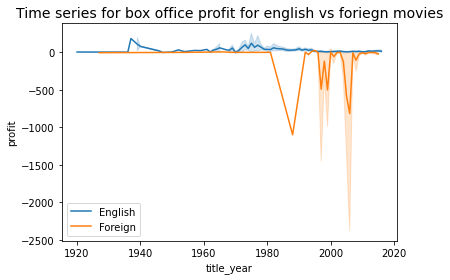

In [63]:
sns.lineplot(data['title_year'], data['profit'],hue=data['language'])
plt.title('Time series for box office profit for english vs foriegn movies',fontsize= 14)
plt.legend()
plt.show()

In [74]:
print('Movies that made huge losses')
data[['movie_title','language','profit']].sort_values('profit',ascending=True).head(10)

Movies that made huge losses


,movie_title,language,profit
2988,The Host,Foreign,-12213.298588
3859,Lady Vengeance,Foreign,-4199.788333
3005,Fateless,Foreign,-2499.804112
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
3423,Akira,Foreign,-1099.560838
4542,Godzilla 2000,Foreign,-989.962610
3851,Tango,Foreign,-698.312689
3075,Kabhi Alvida Naa Kehna,Foreign,-696.724557
3273,Kites,English,-598.397534


In [79]:
data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000

In [80]:
data[data['duration'] == 'Long'][['movie_title','duration','gross','profit']].sort_values('profit',ascending=False).head(10)

,movie_title,duration,gross,profit
0,Avatar,Long,760.505847,523.505847
29,Jurassic World,Long,652.177271,502.177271
26,Titanic,Long,658.672302,458.672302
3024,Star Wars: Episode IV - A New Hope,Long,460.935665,449.935665
17,The Avengers,Long,623.279547,403.279547
240,Star Wars: Episode I - The Phantom Menace,Long,474.544677,359.544677
66,The Dark Knight,Long,533.316061,348.316061
439,The Hunger Games,Long,407.999255,329.999255
186,The Hunger Games: Catching Fire,Long,424.645577,294.645577
697,Jurassic Park,Long,356.784000,293.784000


In [81]:
data[data['duration'] == 'Short'][['movie_title','duration','gross','profit']].sort_values('profit',ascending=False).head(10)

,movie_title,duration,gross,profit
3080,E.T. the Extra-Terrestrial,Short,434.949459,424.449459
509,The Lion King,Short,422.783777,377.783777
812,Deadpool,Short,363.024263,305.024263
521,Despicable Me 2,Short,368.049635,292.049635
338,Finding Nemo,Short,380.838870,286.838870
582,Shrek 2,Short,436.471036,286.471036
2601,Home Alone,Short,285.761243,267.761243
563,Minions,Short,336.029560,262.029560
1181,The Sixth Sense,Short,293.501675,253.501675
125,Frozen,Short,400.736600,250.736600


/home/saad/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration', ylabel='gross'>

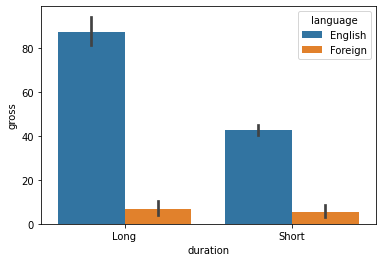

In [83]:
sns.barplot(data['duration'],data['gross'], hue = data['language'])

## IMDB Scores for long and short movies

In [88]:
x = data[data['duration'] == 'Long'][['imdb_score']].mean()
print('Average IMDB score for long movies is',x)

Average IMDB score for long movies is imdb_score    7.059433
dtype: float64


In [89]:
x = data[data['duration'] == 'Short'][['imdb_score']].mean()
print('Average IMDB score for short movies is',x)

Average IMDB score for short movies is imdb_score    6.276941
dtype: float64


In [92]:
data[data['duration'] == 'Long'][['movie_title','imdb_score']].sort_values('imdb_score',ascending= False).head(10)

,movie_title,imdb_score
1937,The Shawshank Redemption,9.3
3466,The Godfather,9.2
66,The Dark Knight,9.0
2837,The Godfather: Part II,9.0
3355,Pulp Fiction,8.9
339,The Lord of the Rings: The Return of the King,8.9
1874,Schindler's List,8.9
4498,"The Good, the Bad and the Ugly",8.9
97,Inception,8.8
270,The Lord of the Rings: The Fellowship of the R...,8.8


In [93]:
data[data['duration'] == 'Short'][['movie_title','imdb_score']].sort_values('imdb_score',ascending= False).head(10)

,movie_title,imdb_score
3592,The Usual Suspects,8.6
3175,American History X,8.6
4427,Modern Times,8.6
2152,Raiders of the Lost Ark,8.5
3931,Samsara,8.5
3277,Alien,8.5
2242,Psycho,8.5
3716,Memento,8.5
2363,Back to the Future,8.5
4028,Whiplash,8.5


/home/saad/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


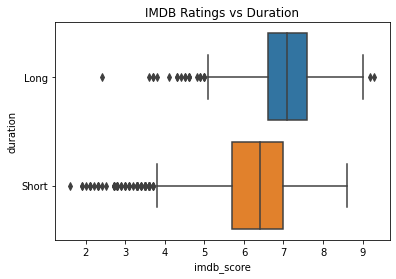

In [96]:
sns.boxplot(data['imdb_score'],data['duration'])
plt.title('IMDB Ratings vs Duration')
plt.show()

## Actors

In [99]:
def actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    
    y = y[['movie_title','budget','title_year','genres','imdb_score','language']]
    
    return y

actors(input('Enter name of the actor / actress:'))

Enter name of the actor / actress:Tom Cruise


,movie_title,budget,title_year,genres,imdb_score,language
75,Edge of Tomorrow,178.0,2014,Action|Adventure|Sci-Fi,7.9,English
135,Mission: Impossible - Rogue Nation,150.0,2015,Action|Adventure|Thriller,7.4,English
155,Mission: Impossible - Ghost Protocol,145.0,2011,Action|Adventure|Thriller,7.4,English
158,The Last Samurai,140.0,2003,Action|Drama|History|War,7.7,English
189,War of the Worlds,132.0,2005,Adventure|Sci-Fi|Thriller,6.5,English
220,Mission: Impossible II,125.0,2000,Action|Adventure|Thriller,6.1,English
234,Knight and Day,117.0,2010,Action|Comedy|Romance,6.3,English
284,Minority Report,102.0,2002,Action|Mystery|Sci-Fi|Thriller,7.7,English
370,Valkyrie,75.0,2008,Drama|History|Thriller|War,7.1,English
438,Mission: Impossible,80.0,1996,Action|Adventure|Thriller,7.1,English


## Making report for actors

In [104]:
def actor_report(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    print('Time Period: ', y['title_year'].min(), y['title_year'].max())
    print('Max Gross: ', y['gross'].max())
    print('Average Gross: ', y['gross'].mean())
    print('Min Gross: ', y['gross'].min())
    print('Number of 100 Million movies: ', y[y['gross'] > 100 ].shape[0])
    print('Average IMDB Score: ', y['imdb_score'].mean())
    print('Most common genres:\n ', y['Genre1'].value_counts().head())

actor_report(input('Enter name of the actor / actress: '))
    

Enter name of the actor / actress: Tom Cruise
Time Period:  1983 2015
Max Gross:  234.277056
Average Gross:  118.93888289285714
Min Gross:  14.99807
Number of 100 Million movies:  17
Average IMDB Score:  7.0928571428571425
Most common genres:
  Action       14
Drama         8
Crime         2
Fantasy       1
Biography     1
Name: Genre1, dtype: int64


In [106]:
def actors_flexible(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    
    return y[input('Enter attribute from data table')].sum().astype('int')
    

actors_flexible(input('Enter name of the actor / actress:'))

Enter name of the actor / actress:Brad Pitt
Enter attribute from data tablenum_critic_for_reviews


7814

In [107]:
actors_flexible(input('Enter name of the actor / actress:'))

Enter name of the actor / actress:Tom Cruise
Enter attribute from data tablenum_critic_for_reviews


6740